In [44]:
# import the packages
import pandas as pd 
import os

# get a sample of the final data
final_model_path = os.path.join('..', 'data', 'final_model_data.csv')
final_model_data = pd.read_csv(final_model_path)
final_model_data_sample = final_model_data.sample(frac=0.01).reset_index(drop=True)
final_model_data_sample.shape

(205, 2)

In [45]:
final_model_data_sample.head()

,clened_review,sentiment_final
0,room day kowloon hotel wonder possibile room h...,Positive
1,good solid relaxing time go punta cana primari...,Neutral
2,great hotel huge room clean lovely bathrooms c...,Positive
3,star small room see friday february barcelona ...,Positive
4,oh dear lastminutecom say adrema hotel berlin ...,Positive


In [46]:
final_model_data_sample['sentiment_final'].value_counts()

sentiment_final
Positive    169
Negative     29
Neutral       7
Name: count, dtype: int64

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(final_model_data_sample['clened_review'])
# convert matrix to dataframe
tfidf_df = pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())
data1 = pd.concat([tfidf_df, final_model_data_sample['sentiment_final']], axis=1)
data1

,aback,ability,able,aboutrestaurant,abruptness,absence,absolute,absoluteall,absolutely,absolutley,...,youit,young,youplease,yourselvesgrounds,youçéèe,yumm,zenlike,zone,zoologcal,sentiment_final
0,0.0,0.0,0.137974,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.063462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4,0.0,0.0,0.089944,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
201,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
202,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.132505,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
203,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [49]:
data = data1.sample(frac=0.95, random_state=103)
data_unseen = data1.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print(f"Data for modelling : {data.shape} | Data for prediction : {data_unseen.shape}")

Data for modelling : (195, 4265) | Data for prediction : (10, 4265)


In [50]:
# now use pycaret
from pycaret.classification import *
exp_clf102 = setup(data=data, target='sentiment_final', session_id=123)

,Description,Value
0,Session id,123
1,Target,sentiment_final
2,Target type,Multiclass
3,Target mapping,"Negative: 0, Neutral: 1, Positive: 2"
4,Original data shape,"(195, 4265)"
5,Transformed data shape,"(195, 4265)"
6,Transformed train set shape,"(136, 4265)"
7,Transformed test set shape,"(59, 4265)"
8,Numeric features,4264
9,Preprocess,True


In [51]:
# first we need to run the compare models
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8319,0.0000,0.8319,0.7581,0.7881,0.2625,0.2810,1.2810
knn,K Neighbors Classifier,0.8242,0.3530,0.8242,0.6852,0.7480,0.0638,0.0774,0.2710
lr,Logistic Regression,0.8170,0.0000,0.8170,0.6685,0.7351,0.0000,0.0000,1.1520
ridge,Ridge Classifier,0.8170,0.0000,0.8170,0.6685,0.7351,0.0000,0.0000,0.2940
rf,Random Forest Classifier,0.8170,0.3710,0.8170,0.6685,0.7351,0.0000,0.0000,0.4960
lda,Linear Discriminant Analysis,0.8170,0.0000,0.8170,0.6685,0.7351,0.0000,0.0000,0.6360
et,Extra Trees Classifier,0.8170,0.3457,0.8170,0.6685,0.7351,0.0000,0.0000,0.3540
dummy,Dummy Classifier,0.8170,0.2500,0.8170,0.6685,0.7351,0.0000,0.0000,0.3010
svm,SVM - Linear Kernel,0.8088,0.0000,0.8088,0.6854,0.7395,0.0222,0.0293,0.3350
nb,Naive Bayes,0.7951,0.2542,0.7951,0.6735,0.7283,-0.0024,-0.0049,0.2410


In [52]:
print(top3)

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jo

In [54]:
rf = create_model('rf', round= 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.86,0.00,0.86,0.73,0.79,0.00,0.00
1,0.79,0.62,0.79,0.62,0.69,0.00,0.00
2,0.79,0.90,0.79,0.62,0.69,0.00,0.00
3,0.79,0.67,0.79,0.62,0.69,0.00,0.00
4,0.79,0.59,0.79,0.62,0.69,0.00,0.00
5,0.79,0.93,0.79,0.62,0.69,0.00,0.00
6,0.85,0.00,0.85,0.72,0.78,0.00,0.00
7,0.85,0.00,0.85,0.72,0.78,0.00,0.00
8,0.85,0.00,0.85,0.72,0.78,0.00,0.00


In [55]:
rf_tuned = tune_model(rf, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0000,0.8571,0.7347,0.7912,0.0000,0.0000
1,0.7857,0.5000,0.7857,0.6173,0.6914,0.0000,0.0000
2,0.7857,0.5000,0.7857,0.6173,0.6914,0.0000,0.0000
3,0.7857,0.5000,0.7857,0.6173,0.6914,0.0000,0.0000
4,0.7857,0.5000,0.7857,0.6173,0.6914,0.0000,0.0000
5,0.7857,0.5000,0.7857,0.6173,0.6914,0.0000,0.0000
6,0.8462,0.0000,0.8462,0.7160,0.7756,0.0000,0.0000
7,0.8462,0.0000,0.8462,0.7160,0.7756,0.0000,0.0000
8,0.8462,0.0000,0.8462,0.7160,0.7756,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predict_model(rf_tuned,data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,aback,ability,able,aboutrestaurant,abruptness,absence,absolute,absoluteall,absolutely,absolutley,...,youplease,yourselvesgrounds,youçéèe,yumm,zenlike,zone,zoologcal,sentiment_final,prediction_label,prediction_score
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.151021,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.82
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.88
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.83
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,1.00
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.82
5,0.0,0.0,0.093802,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.87
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.89
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.97
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.97
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.090962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive,Positive,0.91


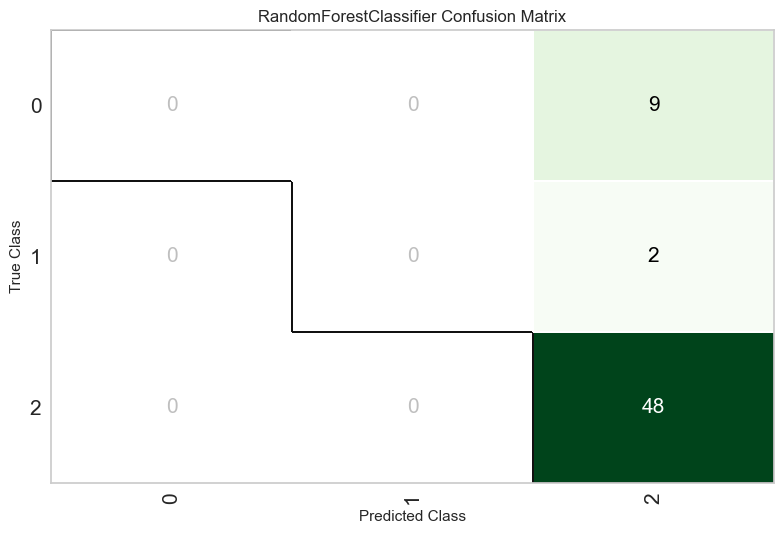

In [72]:
plot_model(rf_tuned,plot='confusion_matrix')

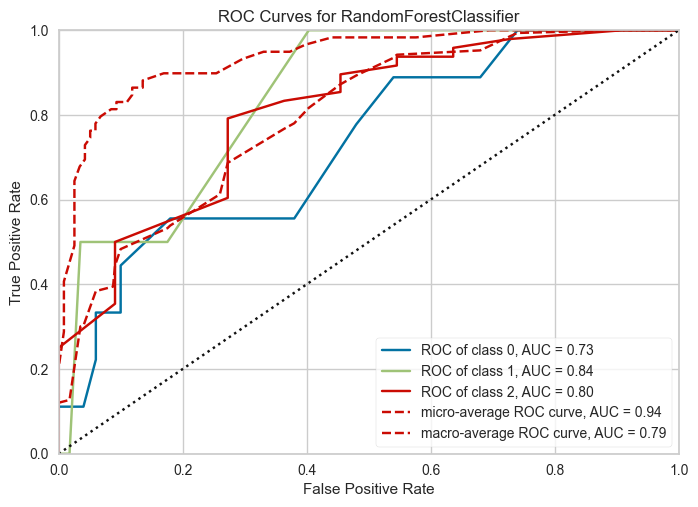

In [73]:
plot_model(rf_tuned,plot='auc')